In [2]:
import pandas as pd
import numpy as ny
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the whole excel file
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)

In [4]:
# Overview of the Demography of each Age group and Gender
# Define the age group mapping
age_group_mapping = {
    1: '20-29y',
    2: '30-39y',
    3: '40-49y',
    4: '50-59y',
    5: '60-69y',
    6: '70y+'
}

# Map the 'Age group' in the dataframe
df['Age group'] = df['Age group'].map(age_group_mapping)

In [5]:
import pandas as pd
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)
# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensure the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK'
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define a custom aggregation dictionary for mean and std
agg_dict = {col: ['mean', 'std'] for col in numeric_columns}

# Grouping and aggregating the data
result = df.groupby(['Age group', 'Sex']).agg(agg_dict).round(2)

# Flattening the MultiIndex columns
result.columns = ['_'.join(col).strip() for col in result.columns.values]

# Display the result
print(result)


                  Bacteria_mean  Bacteria_std  Dryness_mean  Dryness_std  \
Age group Sex                                                              
1         female           3.91          1.42         28.98         1.40   
          male             4.27          1.35         28.79         1.46   
2         female           4.00          1.59         28.94         1.79   
          male             3.93          1.42         29.02         2.25   
3         female           4.57          0.69         27.95         2.01   
          male             3.37          1.49         29.29         1.38   
4         female           2.63          1.16         27.55         2.40   
          male             3.60          1.52         28.76         1.14   
5         female           3.03          1.65         26.83         3.52   
          male             3.53          1.27         26.37         6.68   
6         female           3.92          1.19         27.57         1.85   
          ma

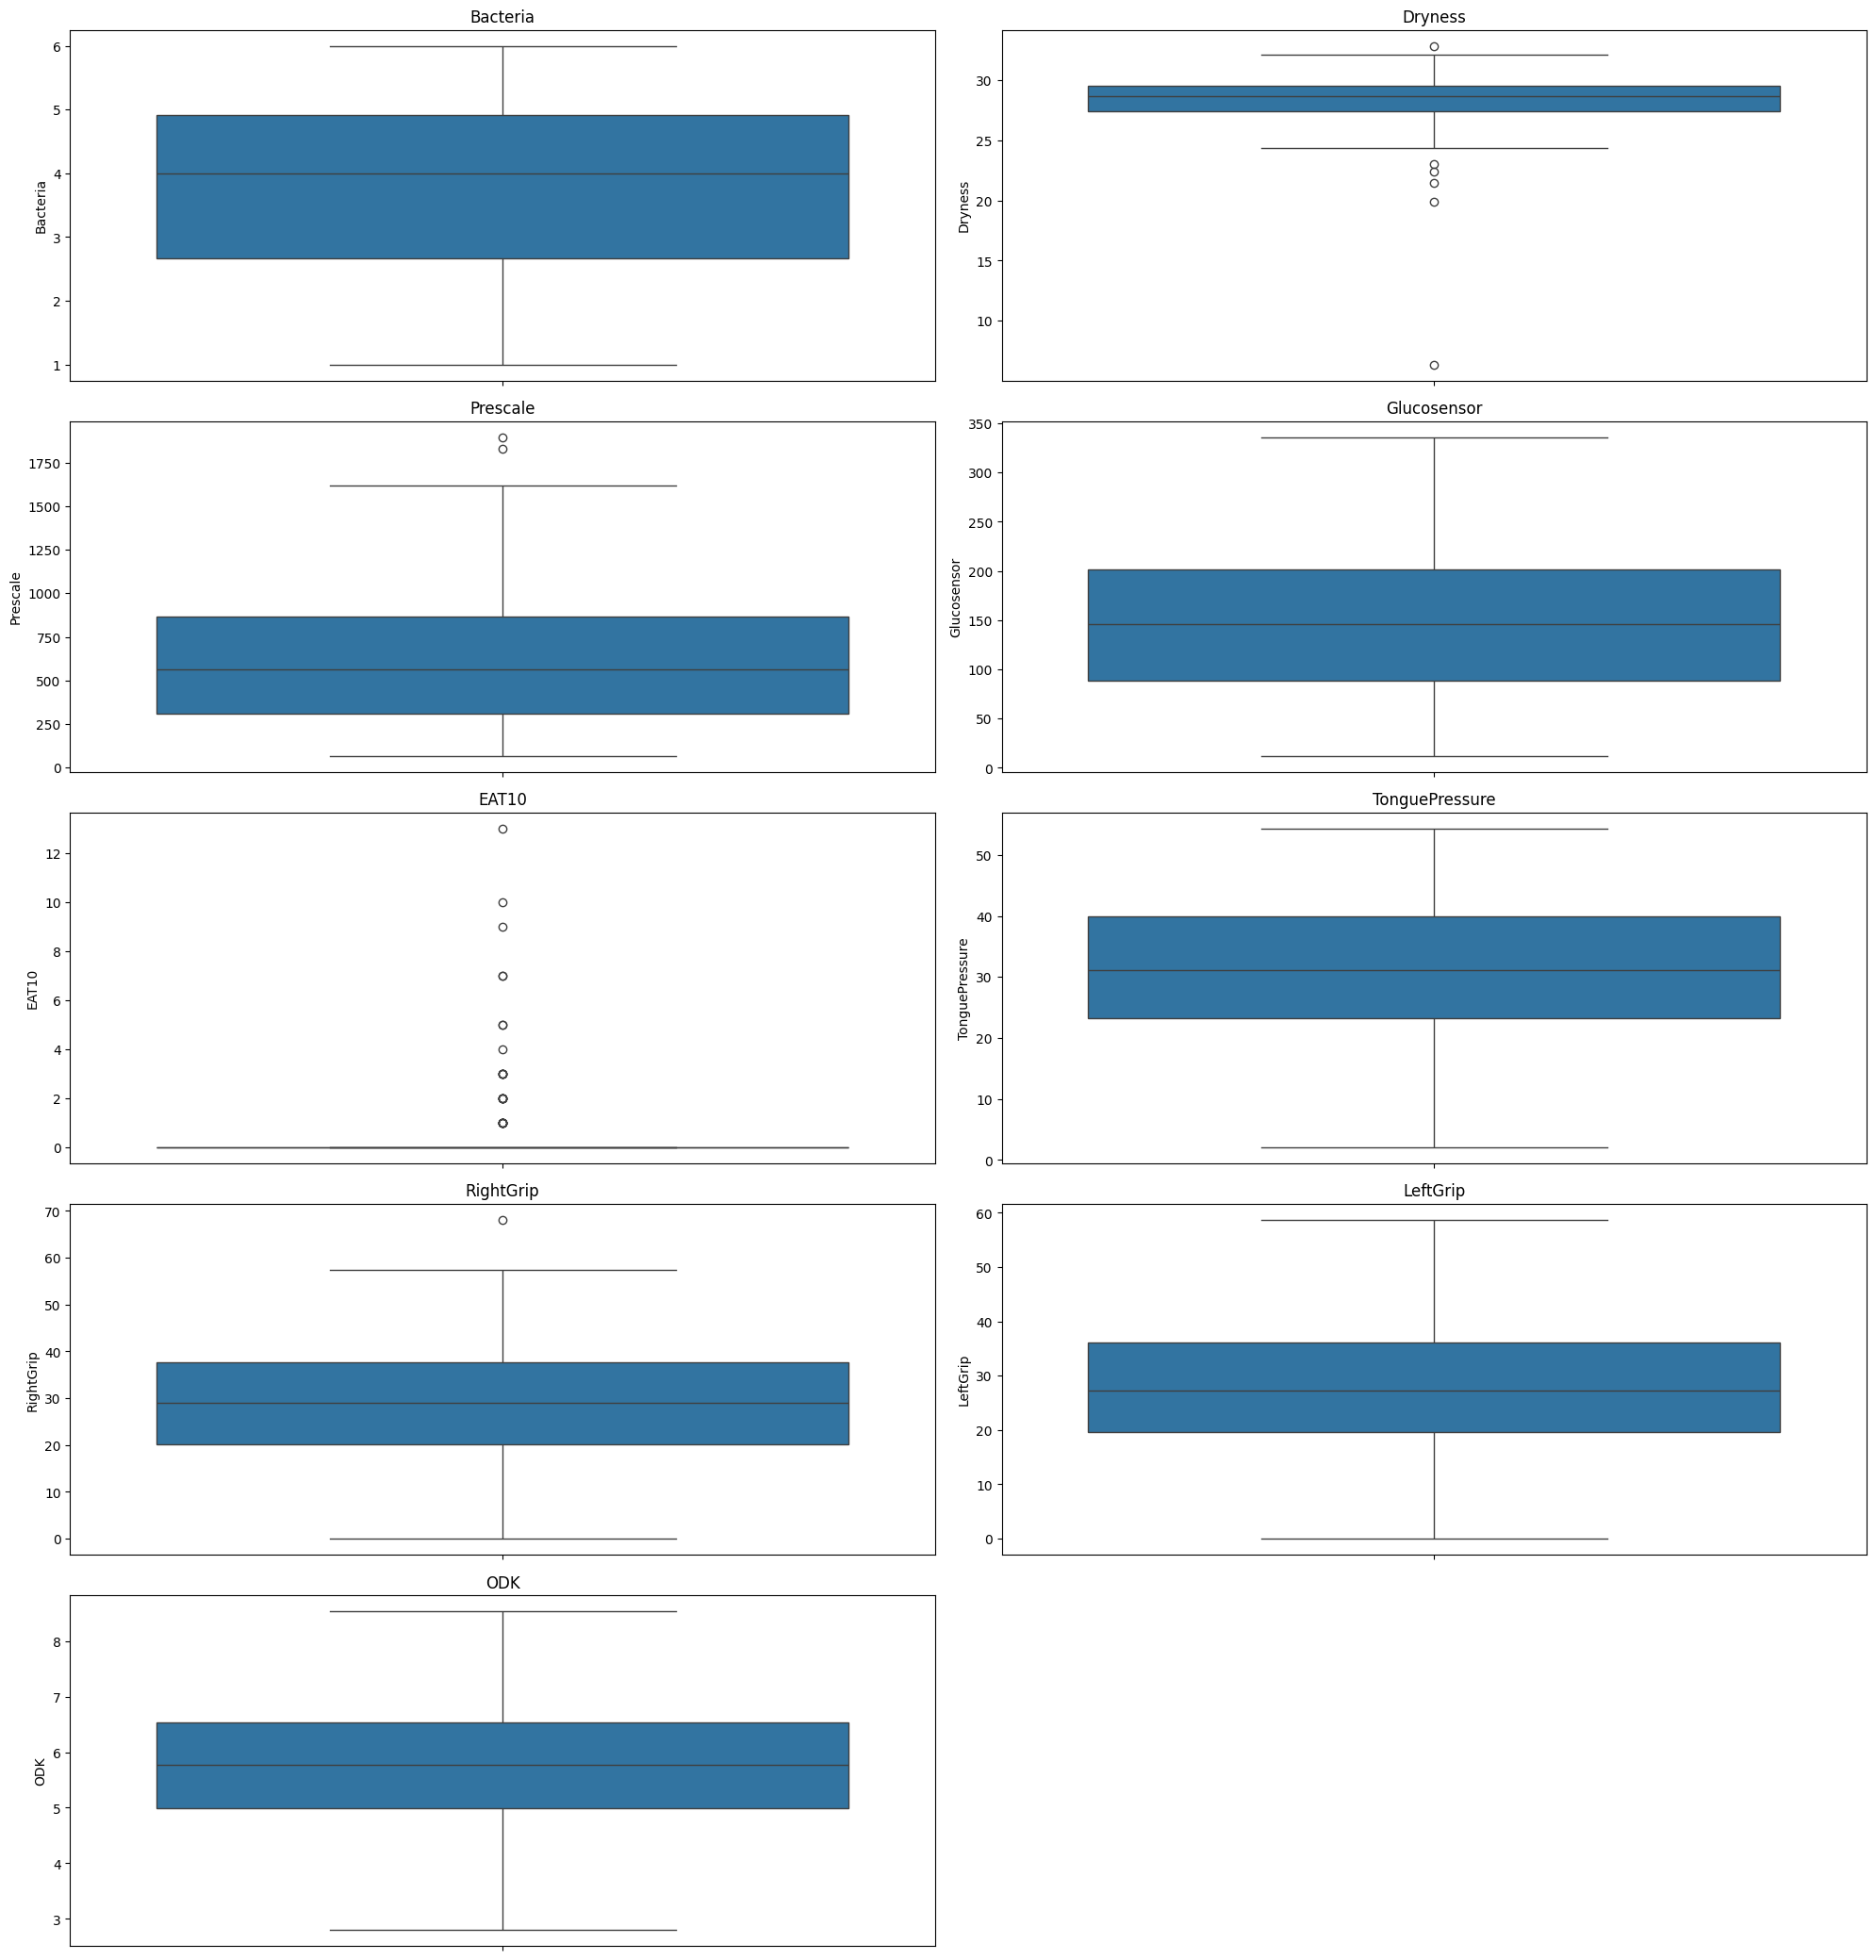

                  Bacteria_mean  Bacteria_std  Dryness_mean  Dryness_std  \
Age group Sex                                                              
1         female           3.91          1.42         28.98         1.40   
          male             4.27          1.35         28.79         1.46   
2         female           4.00          1.59         28.94         1.79   
          male             3.93          1.42         29.02         2.25   
3         female           4.57          0.69         27.95         2.01   
          male             3.37          1.49         29.29         1.38   
4         female           2.63          1.16         27.55         2.40   
          male             3.60          1.52         28.76         1.14   
5         female           3.03          1.65         26.83         3.52   
          male             3.53          1.27         26.37         6.68   
6         female           3.92          1.19         27.57         1.85   
          ma

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)

# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensure the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK'
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display boxplots for numeric columns
plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_columns):
    plt.subplot(6, 2, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(col)

plt.tight_layout()
plt.savefig('boxplots_with_outliers.png')  # Save the boxplots as a picture
plt.show()

# Define a custom aggregation dictionary for mean and std
agg_dict = {col: ['mean', 'std'] for col in numeric_columns}

# Grouping and aggregating the data
result = df.groupby(['Age group', 'Sex']).agg(agg_dict).round(2)

# Flattening the MultiIndex columns
result.columns = ['_'.join(col).strip() for col in result.columns.values]

# Display the result
print(result)


In [7]:
import pandas as pd
from scipy.stats import ttest_ind
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)

# Map the 'Age group' in the dataframe
age_group_mapping = {
    1: '20-29y',
    2: '30-39y',
    3: '40-49y',
    4: '50-59y',
    5: '60-69y',
    6: '70y+'
}
df['Age group'] = df['Age group'].map(age_group_mapping)

# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)
# Ensure numeric columns are numeric
numeric_columns = ['Bacteria', 'Dryness', 'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK','Prescale', 'Glucosensor']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate overall means for each age group combining both sexes
overall_means = df.groupby('Age group')[numeric_columns].mean().round(2)
print("Overall means combining both sexes:")
print(overall_means)

Overall means combining both sexes:
           Bacteria  Dryness  TonguePressure  RightGrip  LeftGrip   ODK  \
Age group                                                                 
20-29y         4.08    28.90           36.92      39.16     33.89  6.70   
30-39y         3.97    28.98           34.93      32.90     32.57  6.05   
40-49y         3.97    28.62           32.76      30.43     29.96  5.90   
50-59y         3.12    28.16           32.58      29.12     27.69  5.36   
60-69y         3.30    26.58           28.29      26.51     25.17  5.23   
70y+           3.84    27.66           23.01      20.96     20.73  4.80   

           Prescale  Glucosensor  
Age group                         
20-29y       854.42       220.86  
30-39y       905.50       176.05  
40-49y       578.65       150.70  
50-59y       587.77       115.60  
60-69y       409.30       119.47  
70y+         460.03       115.78  


In [8]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)

# Map the 'Age group' in the dataframe
age_group_mapping = {
    1: '20-29y',
    2: '30-39y',
    3: '40-49y',
    4: '50-59y',
    5: '60-69y',
    6: '70y+'
}
df['Age group'] = df['Age group'].map(age_group_mapping)

# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensure numeric columns are numeric
numeric_columns = ['Prescale', 'Glucosensor', 'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Initialize a list to store results
results = []

# Iterate over each age group
for age_group in df['Age group'].unique():
    # Filter data for the current age group
    data_age_group = df[df['Age group'] == age_group]
    
    # Ensure 'Sex' column is correctly handled
    if 'Sex' in data_age_group.columns:
        # Separate data by sex
        males = data_age_group[data_age_group['Sex'] == 'male']
        females = data_age_group[data_age_group['Sex'] == 'female']
        
        print(f"\nAge group: {age_group}")
        print(f"Number of males: {len(males)}, Number of females: {len(females)}")
        
        for col in numeric_columns:
            # Perform independent t-test if there are non-NaN values
            if not males[col].isna().all() and not females[col].isna().all():
                stat, p_value = ttest_ind(males[col].dropna(), females[col].dropna(), equal_var=False)
                results.append({
                    'Age group': age_group,
                    'Parameter': col,
                    'Statistic': stat,
                    'P-value': p_value
                })
            else:
                print(f"Not enough data to compare for {col} in age group {age_group}")

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display results
print("Differences between males and females for each parameter within the same age group (Independent t-test):")
print(results_df)

# Save results to Excel
results_df.to_excel('sex_comparison_results_ttest.xlsx', index=False)



Age group: 20-29y
Number of males: 10, Number of females: 11

Age group: 30-39y
Number of males: 10, Number of females: 10

Age group: 40-49y
Number of males: 10, Number of females: 10

Age group: 50-59y
Number of males: 10, Number of females: 10

Age group: 60-69y
Number of males: 12, Number of females: 10

Age group: 70y+
Number of males: 10, Number of females: 13
Differences between males and females for each parameter within the same age group (Independent t-test):
   Age group       Parameter  Statistic       P-value
0     20-29y        Prescale   1.444819  1.757602e-01
1     20-29y     Glucosensor   0.243924  8.108581e-01
2     20-29y  TonguePressure   0.793671  4.407571e-01
3     20-29y       RightGrip   5.886448  1.662278e-04
4     20-29y        LeftGrip   6.699773  1.302907e-05
5     20-29y             ODK  -0.145300  8.860417e-01
6     30-39y        Prescale   0.404439  6.912248e-01
7     30-39y     Glucosensor   0.368621  7.183744e-01
8     30-39y  TonguePressure   1.104265

In [9]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load the dataset
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)

# Map the 'Age group' in the dataframe
age_group_mapping = {
    1: '20-29y',
    2: '30-39y',
    3: '40-49y',
    4: '50-59y',
    5: '60-69y',
    6: '70y+'
}
df['Age group'] = df['Age group'].map(age_group_mapping)

# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensure numeric columns are numeric
numeric_columns = ['Bacteria', 'Dryness', 'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK', 'EAT10']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Initialize a list to store results
results = []

# Iterate over each age group
for age_group in df['Age group'].unique():
    # Filter data for the current age group
    data_age_group = df[df['Age group'] == age_group]
    
    # Ensure 'Sex' column is correctly handled
    if 'Sex' in data_age_group.columns:
        # Separate data by sex
        males = data_age_group[data_age_group['Sex'] == 'male']
        females = data_age_group[data_age_group['Sex'] == 'female']
        
        for col in ['EAT10', 'Bacteria', 'Dryness']:
            # Perform Mann-Whitney U test
            if not males[col].isna().all() and not females[col].isna().all():
                stat, p_value = mannwhitneyu(males[col].dropna(), females[col].dropna(), alternative='two-sided')
                results.append({
                    'Age group': age_group,
                    'Parameter': col,
                    'Statistic': stat,
                    'P-value': p_value
                })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display results
print("Differences between males and females for each parameter within the same age group (Mann-Whitney U Test):")
print(results_df)
results_df.to_excel('sex_comparison_results_mwtest.xlsx', index=False)

Differences between males and females for each parameter within the same age group (Mann-Whitney U Test):
   Age group Parameter  Statistic   P-value
0     20-29y     EAT10       50.0  0.602466
1     20-29y  Bacteria       59.5  0.776565
2     20-29y   Dryness       44.5  0.732246
3     30-39y     EAT10       45.0  0.368120
4     30-39y  Bacteria       45.5  0.759097
5     30-39y   Dryness       54.5  0.762282
6     40-49y     EAT10       36.0  0.178721
7     40-49y  Bacteria       23.5  0.046309
8     40-49y   Dryness       68.5  0.173456
9     50-59y     EAT10       40.5  0.330092
10    50-59y  Bacteria       68.5  0.170369
11    50-59y   Dryness       69.5  0.150773
12    60-69y     EAT10       55.0  0.704750
13    60-69y  Bacteria       74.5  0.351688
14    60-69y   Dryness       62.5  0.895053
15      70y+     EAT10       54.0  0.443254
16      70y+  Bacteria       60.5  0.802739
17      70y+   Dryness       64.0  0.975257


In [10]:
import pandas as pd
from itertools import combinations
from scipy.stats import mannwhitneyu

# Load the data
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)

# Map the 'Age group' in the dataframe
age_group_mapping = {
    1: '20-29y',
    2: '30-39y',
    3: '40-49y',
    4: '50-59y',
    5: '60-69y',
    6: '70y+'
}
df['Age group'] = df['Age group'].map(age_group_mapping)

# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensure numeric columns are numeric
numeric_columns = ['Bacteria', 'Dryness', 'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK', 'Glucosensor', 'EAT10']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# List to store results
results = []

# Iterate over combinations of age groups
for group1, group2 in combinations(df['Age group'].unique(), 2):
    data_group1 = df[df['Age group'] == group1]
    data_group2 = df[df['Age group'] == group2]
    
    for col in ['EAT10']:  # Only consider 'Bacteria' column
        stat, p_value = mannwhitneyu(data_group1[col].dropna(), data_group2[col].dropna())
        results.append({
            'Age group 1': group1,
            'Age group 2': group2,
            'Column': col,
            'Statistic': stat,
            'P-value': p_value
        })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Print columns to verify exact names
print(results_df.columns)

# Sort by columns: 'Age group 1', 'Age group 2', and 'P-value'
results_df = results_df.sort_values(by=['Age group 1', 'Age group 2', 'P-value']).reset_index(drop=True)

# Display results
print("Overall differences between age groups (p-values) for 'EAT10' column - Ordered:")
print(results_df)

# Save results to Excel
results_df.to_excel('2.xlsx', index=False)


Index(['Age group 1', 'Age group 2', 'Column', 'Statistic', 'P-value'], dtype='object')
Overall differences between age groups (p-values) for 'EAT10' column - Ordered:
   Age group 1 Age group 2 Column  Statistic   P-value
0       20-29y      30-39y  EAT10      230.0  0.322982
1       20-29y      40-49y  EAT10      186.0  0.374832
2       20-29y      50-59y  EAT10      196.5  0.604652
3       20-29y      60-69y  EAT10      196.0  0.238241
4       20-29y        70y+  EAT10      183.5  0.075517
5       30-39y      40-49y  EAT10      159.0  0.077495
6       30-39y      50-59y  EAT10      169.0  0.150844
7       30-39y      60-69y  EAT10      168.0  0.045626
8       30-39y        70y+  EAT10      157.5  0.013672
9       40-49y      50-59y  EAT10      210.0  0.724805
10      40-49y      60-69y  EAT10      210.0  0.756900
11      40-49y        70y+  EAT10      197.0  0.329986
12      50-59y      60-69y  EAT10      201.0  0.532510
13      50-59y        70y+  EAT10      188.0  0.201171
14     

In [11]:
import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind

df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)
# Map the 'Age group' in the dataframe
age_group_mapping = {
    1: '20-29y',
    2: '30-39y',
    3: '40-49y',
    4: '50-59y',
    5: '60-69y',
    6: '70y+'
}
df['Age group'] = df['Age group'].map(age_group_mapping)

# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensure numeric columns are numeric
numeric_columns = ['Bacteria', 'Dryness', 'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK', 'Glucosensor', 'EAT10']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# List to store results
results = []

# Iterate over combinations of age groups
for group1, group2 in combinations(df['Age group'].unique(), 2):
    data_group1 = df[df['Age group'] == group1]
    data_group2 = df[df['Age group'] == group2]
    
    for col in ['RightGrip']:  # Only consider 'Glucosensor' column
        stat, p_value = ttest_ind(data_group1[col], data_group2[col])
        results.append({
            'Age group 1': group1,
            'Age group 2': group2,
            'Column': col,
            'Statistic': stat,
            'P-value': p_value
        })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Print columns to verify exact names
print(results_df.columns)

# Sort by columns: 'Age group 1', 'Age group 2', and 'P-value'
results_df = results_df.sort_values(by=['Age group 1', 'Age group 2', 'P-value']).reset_index(drop=True)

# Display results
print("Overall differences between age groups (p-values) for 'RightGrip' column - Ordered:")
print(results_df)

results_df.to_excel('2.xlsx', index=False)

Index(['Age group 1', 'Age group 2', 'Column', 'Statistic', 'P-value'], dtype='object')
Overall differences between age groups (p-values) for 'RightGrip' column - Ordered:
   Age group 1 Age group 2     Column  Statistic   P-value
0       20-29y      30-39y  RightGrip        NaN       NaN
1       20-29y      40-49y  RightGrip        NaN       NaN
2       20-29y      50-59y  RightGrip        NaN       NaN
3       20-29y      60-69y  RightGrip        NaN       NaN
4       20-29y        70y+  RightGrip        NaN       NaN
5       30-39y      40-49y  RightGrip   0.574508  0.569010
6       30-39y      50-59y  RightGrip   0.945245  0.350506
7       30-39y      60-69y  RightGrip   1.847565  0.072070
8       30-39y        70y+  RightGrip   3.368678  0.001654
9       40-49y      50-59y  RightGrip   0.324809  0.747107
10      40-49y      60-69y  RightGrip   1.118288  0.270115
11      40-49y        70y+  RightGrip   2.637389  0.011750
12      50-59y      60-69y  RightGrip   0.820395  0.416853
13

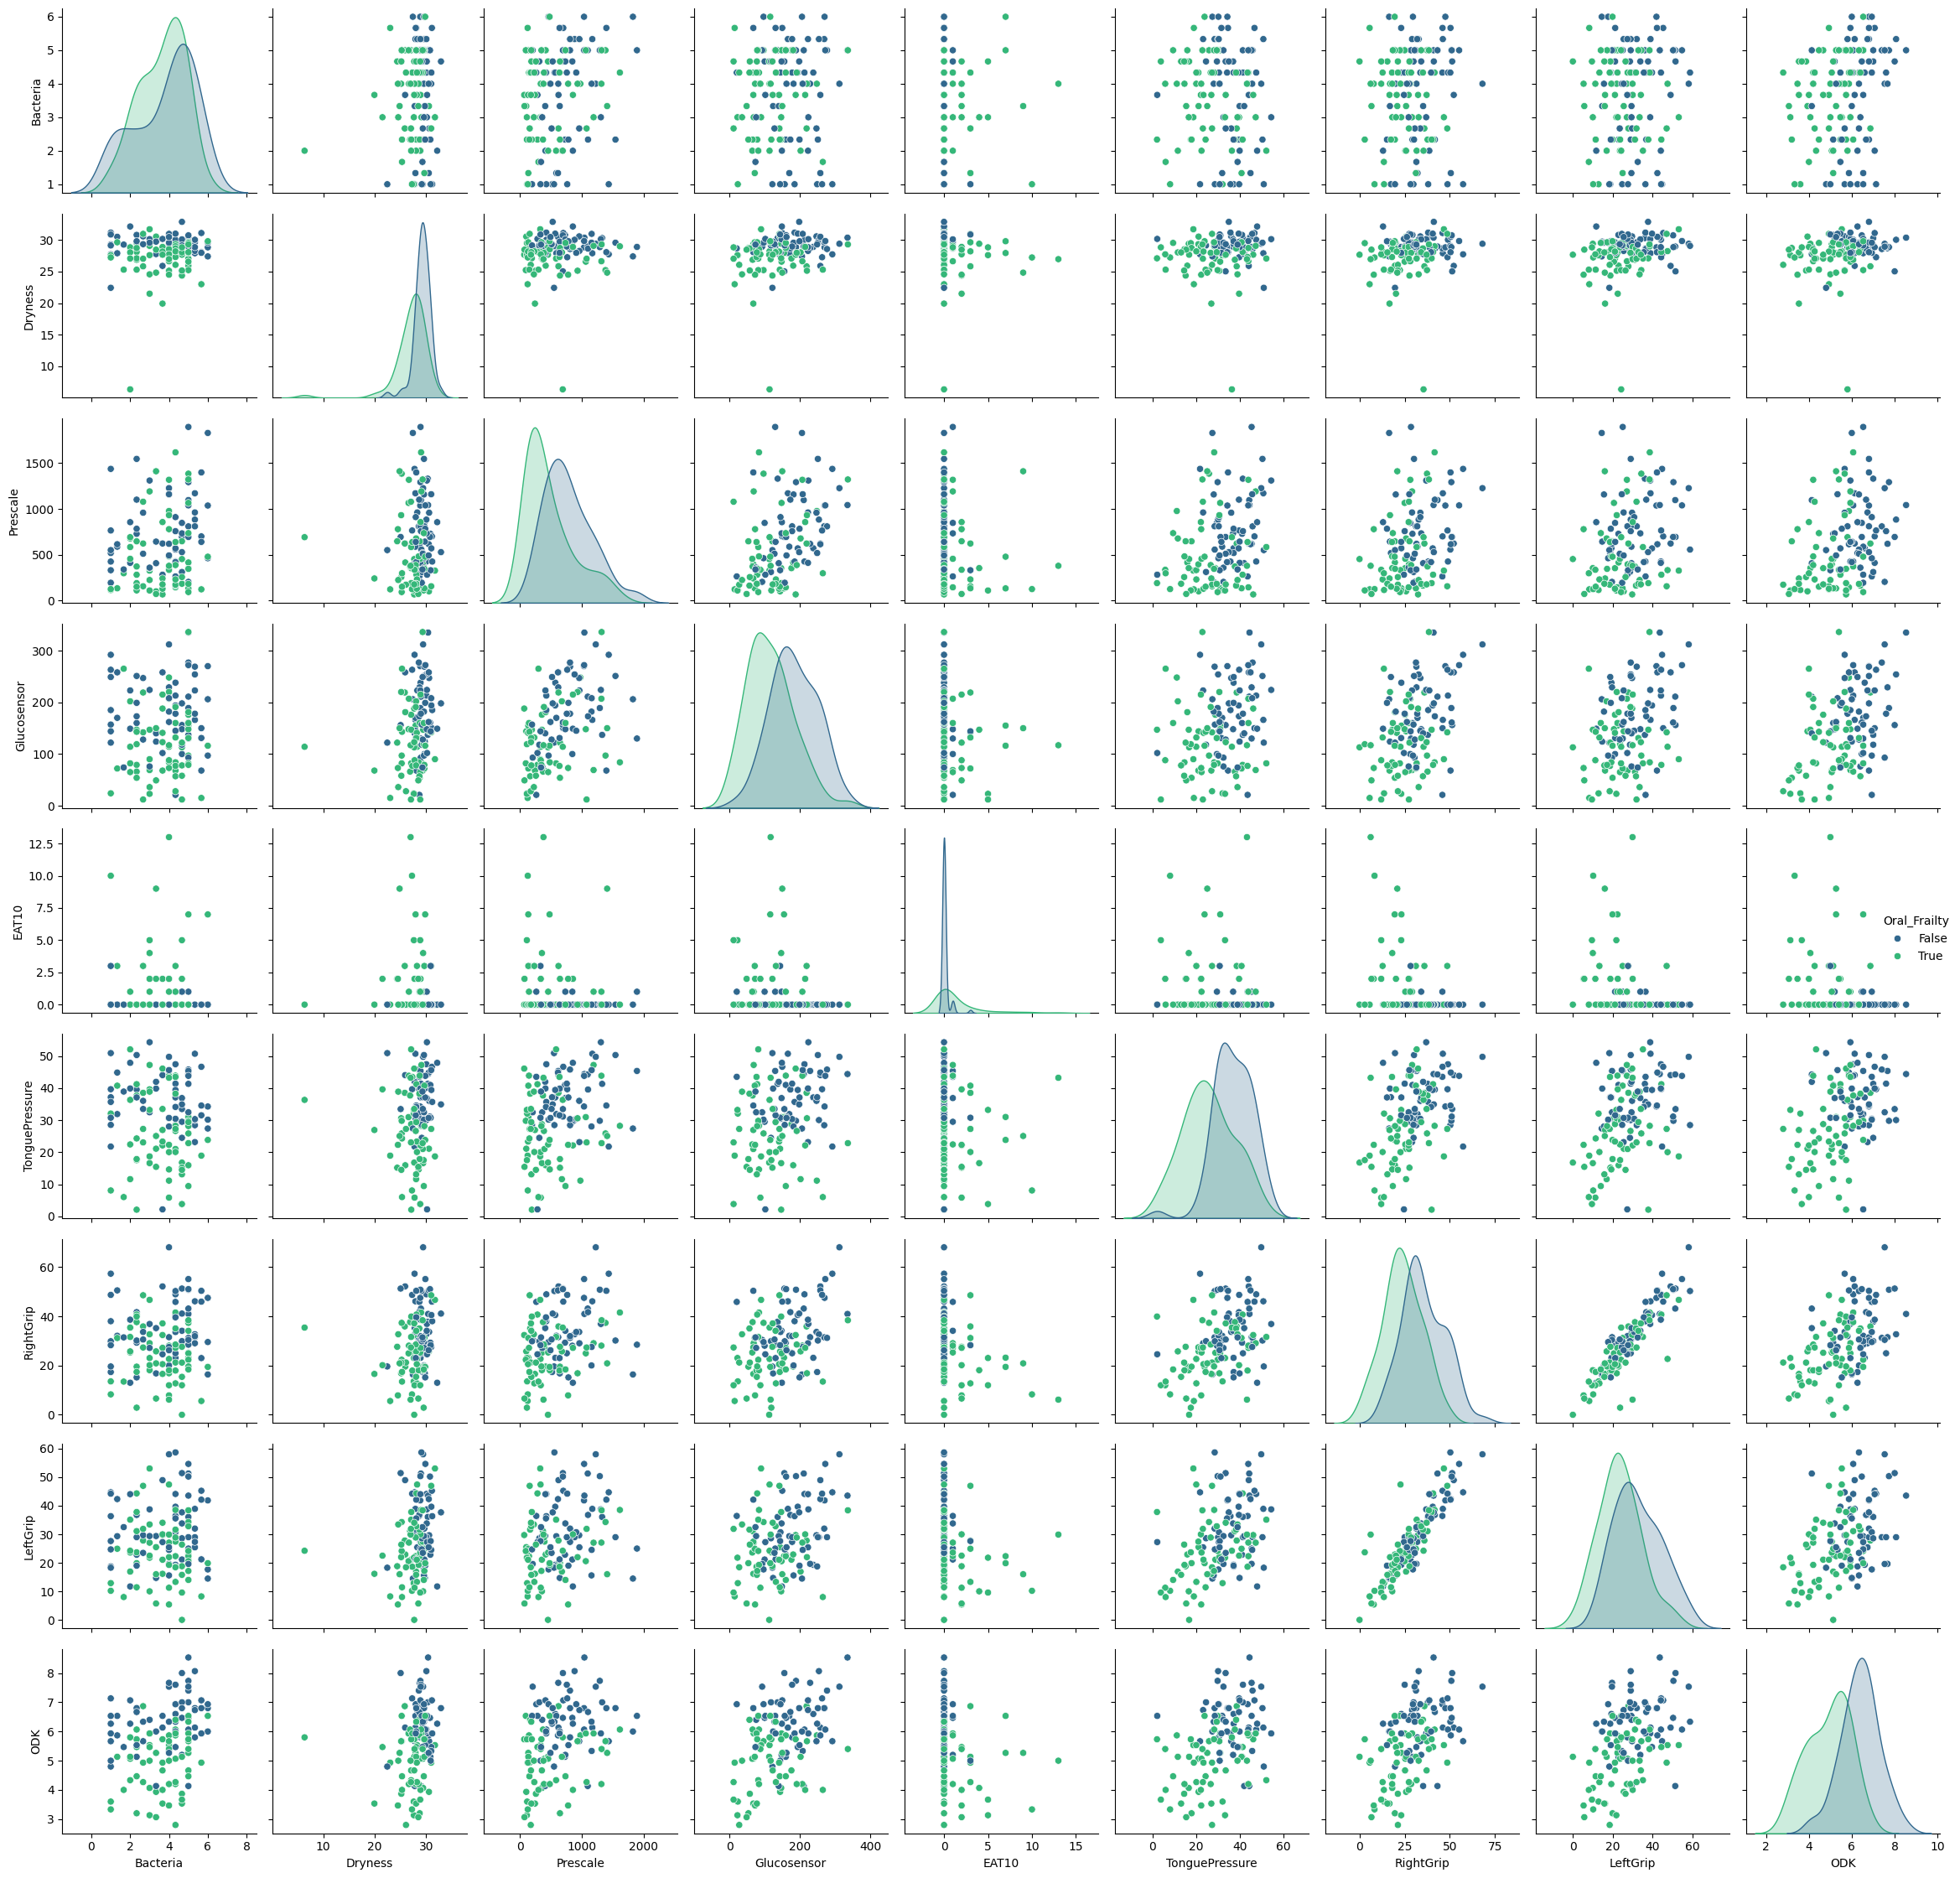

In [12]:
# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensuring the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK'
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define the function to check for oral hypofunction
def check_oral_hypofunction(row):
    conditions = [
        row['Bacteria'] >= 2,
        row['Dryness'] < 27,
        row['Prescale'] < 200,
        row['ODK'] < 6,
        row['TonguePressure'] < 30,
        row['Glucosensor'] < 100,
        row['EAT10'] >= 3
    ]
    return sum(conditions) >= 3

# Apply the function row-wise
df['Oral_Frailty'] = df.apply(check_oral_hypofunction, axis=1)

# Select the columns for the pair plot including 'Oral_Hypofunction'
pairplot_cols = numeric_columns + ['Oral_Frailty']

# Create the pair plot
sns.pairplot(df[pairplot_cols], hue='Oral_Frailty', palette='viridis')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

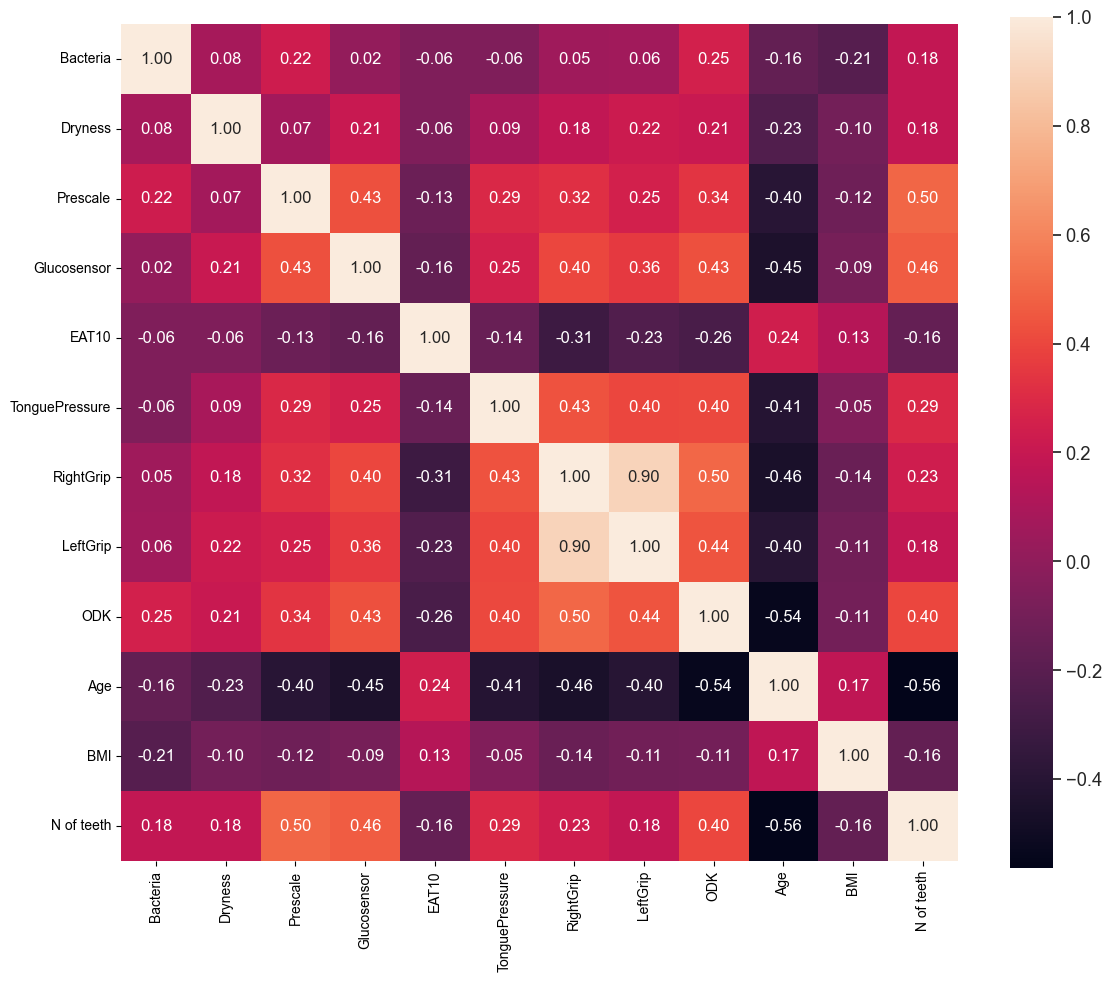

In [9]:
# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensuring the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK',
    'Age', 'BMI', 'N of teeth'
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix for the selected columns
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap for the correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the figsize as needed
sns.set(font_scale=1.2)
heatmap = sns.heatmap(
    correlation_matrix, 
    ax=ax, 
    cbar=True, 
    annot=True, 
    square=True, 
    fmt='.2f', 
    annot_kws={'size': 12}, 
    yticklabels=numeric_columns, 
    xticklabels=numeric_columns,
)

# Adjust the layout
plt.tight_layout()

# Show the heatmap
plt.show()

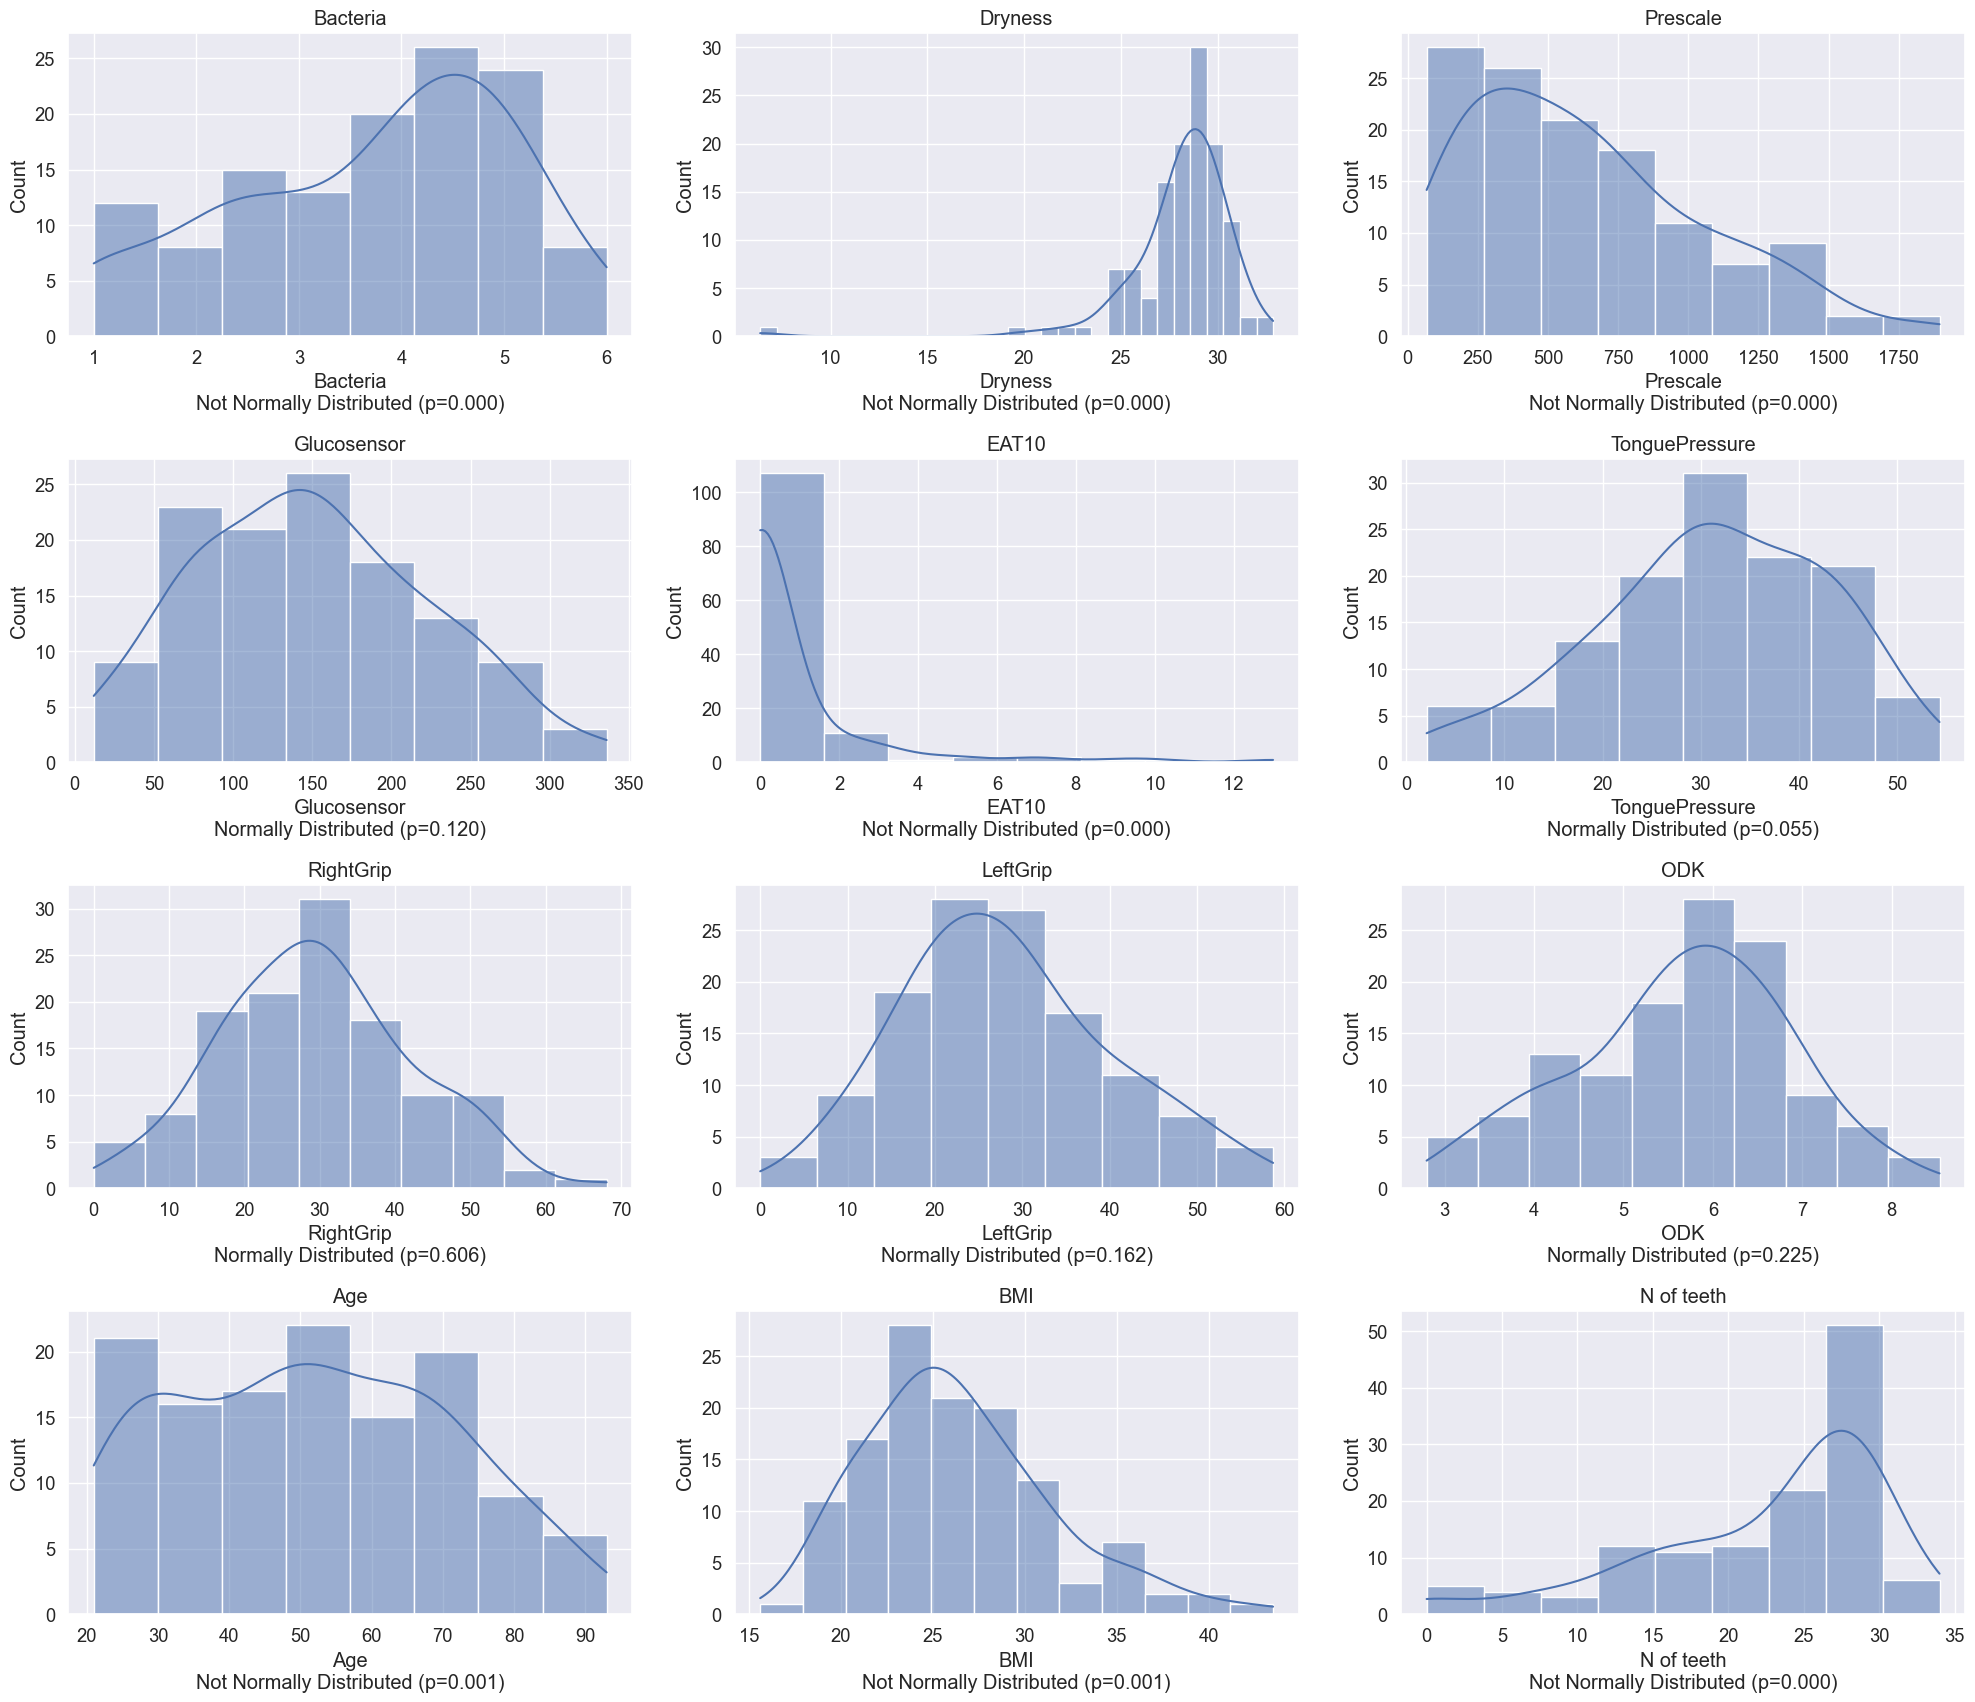

Normality Test Results (Shapiro-Wilk Test):
Bacteria: Not Normally Distributed (p=0.000)
Dryness: Not Normally Distributed (p=0.000)
Prescale: Not Normally Distributed (p=0.000)
Glucosensor: Normally Distributed (p=0.120)
EAT10: Not Normally Distributed (p=0.000)
TonguePressure: Normally Distributed (p=0.055)
RightGrip: Normally Distributed (p=0.606)
LeftGrip: Normally Distributed (p=0.162)
ODK: Normally Distributed (p=0.225)
Age: Not Normally Distributed (p=0.001)
BMI: Not Normally Distributed (p=0.001)
N of teeth: Not Normally Distributed (p=0.000)


In [10]:
from scipy.stats import shapiro
# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensuring the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK',
    'Age', 'BMI', 'N of teeth'
]

# Ensuring the columns used in the aggregation are numeric
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Function to check normality and plot distributions
def check_normality_and_plot(df, numeric_columns):
    normality_results = {}
    plt.figure(figsize=(20, 25))
    for i, col in enumerate(numeric_columns):
        plt.subplot(6, 3, i+1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(col)
        
        # Perform Shapiro-Wilk test
        stat, p_value = shapiro(df[col].dropna())
        normality_results[col] = p_value
        
        if p_value > 0.05:
            plt.xlabel(f'{col}\nNormally Distributed (p={p_value:.3f})')
        else:
            plt.xlabel(f'{col}\nNot Normally Distributed (p={p_value:.3f})')

    plt.tight_layout()
    plt.show()
    
    return normality_results

# Check normality and plot distributions
normality_results = check_normality_and_plot(df, numeric_columns)

# Display results
print("Normality Test Results (Shapiro-Wilk Test):")
for col, p_value in normality_results.items():
    print(f"{col}: {'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'} (p={p_value:.3f})")


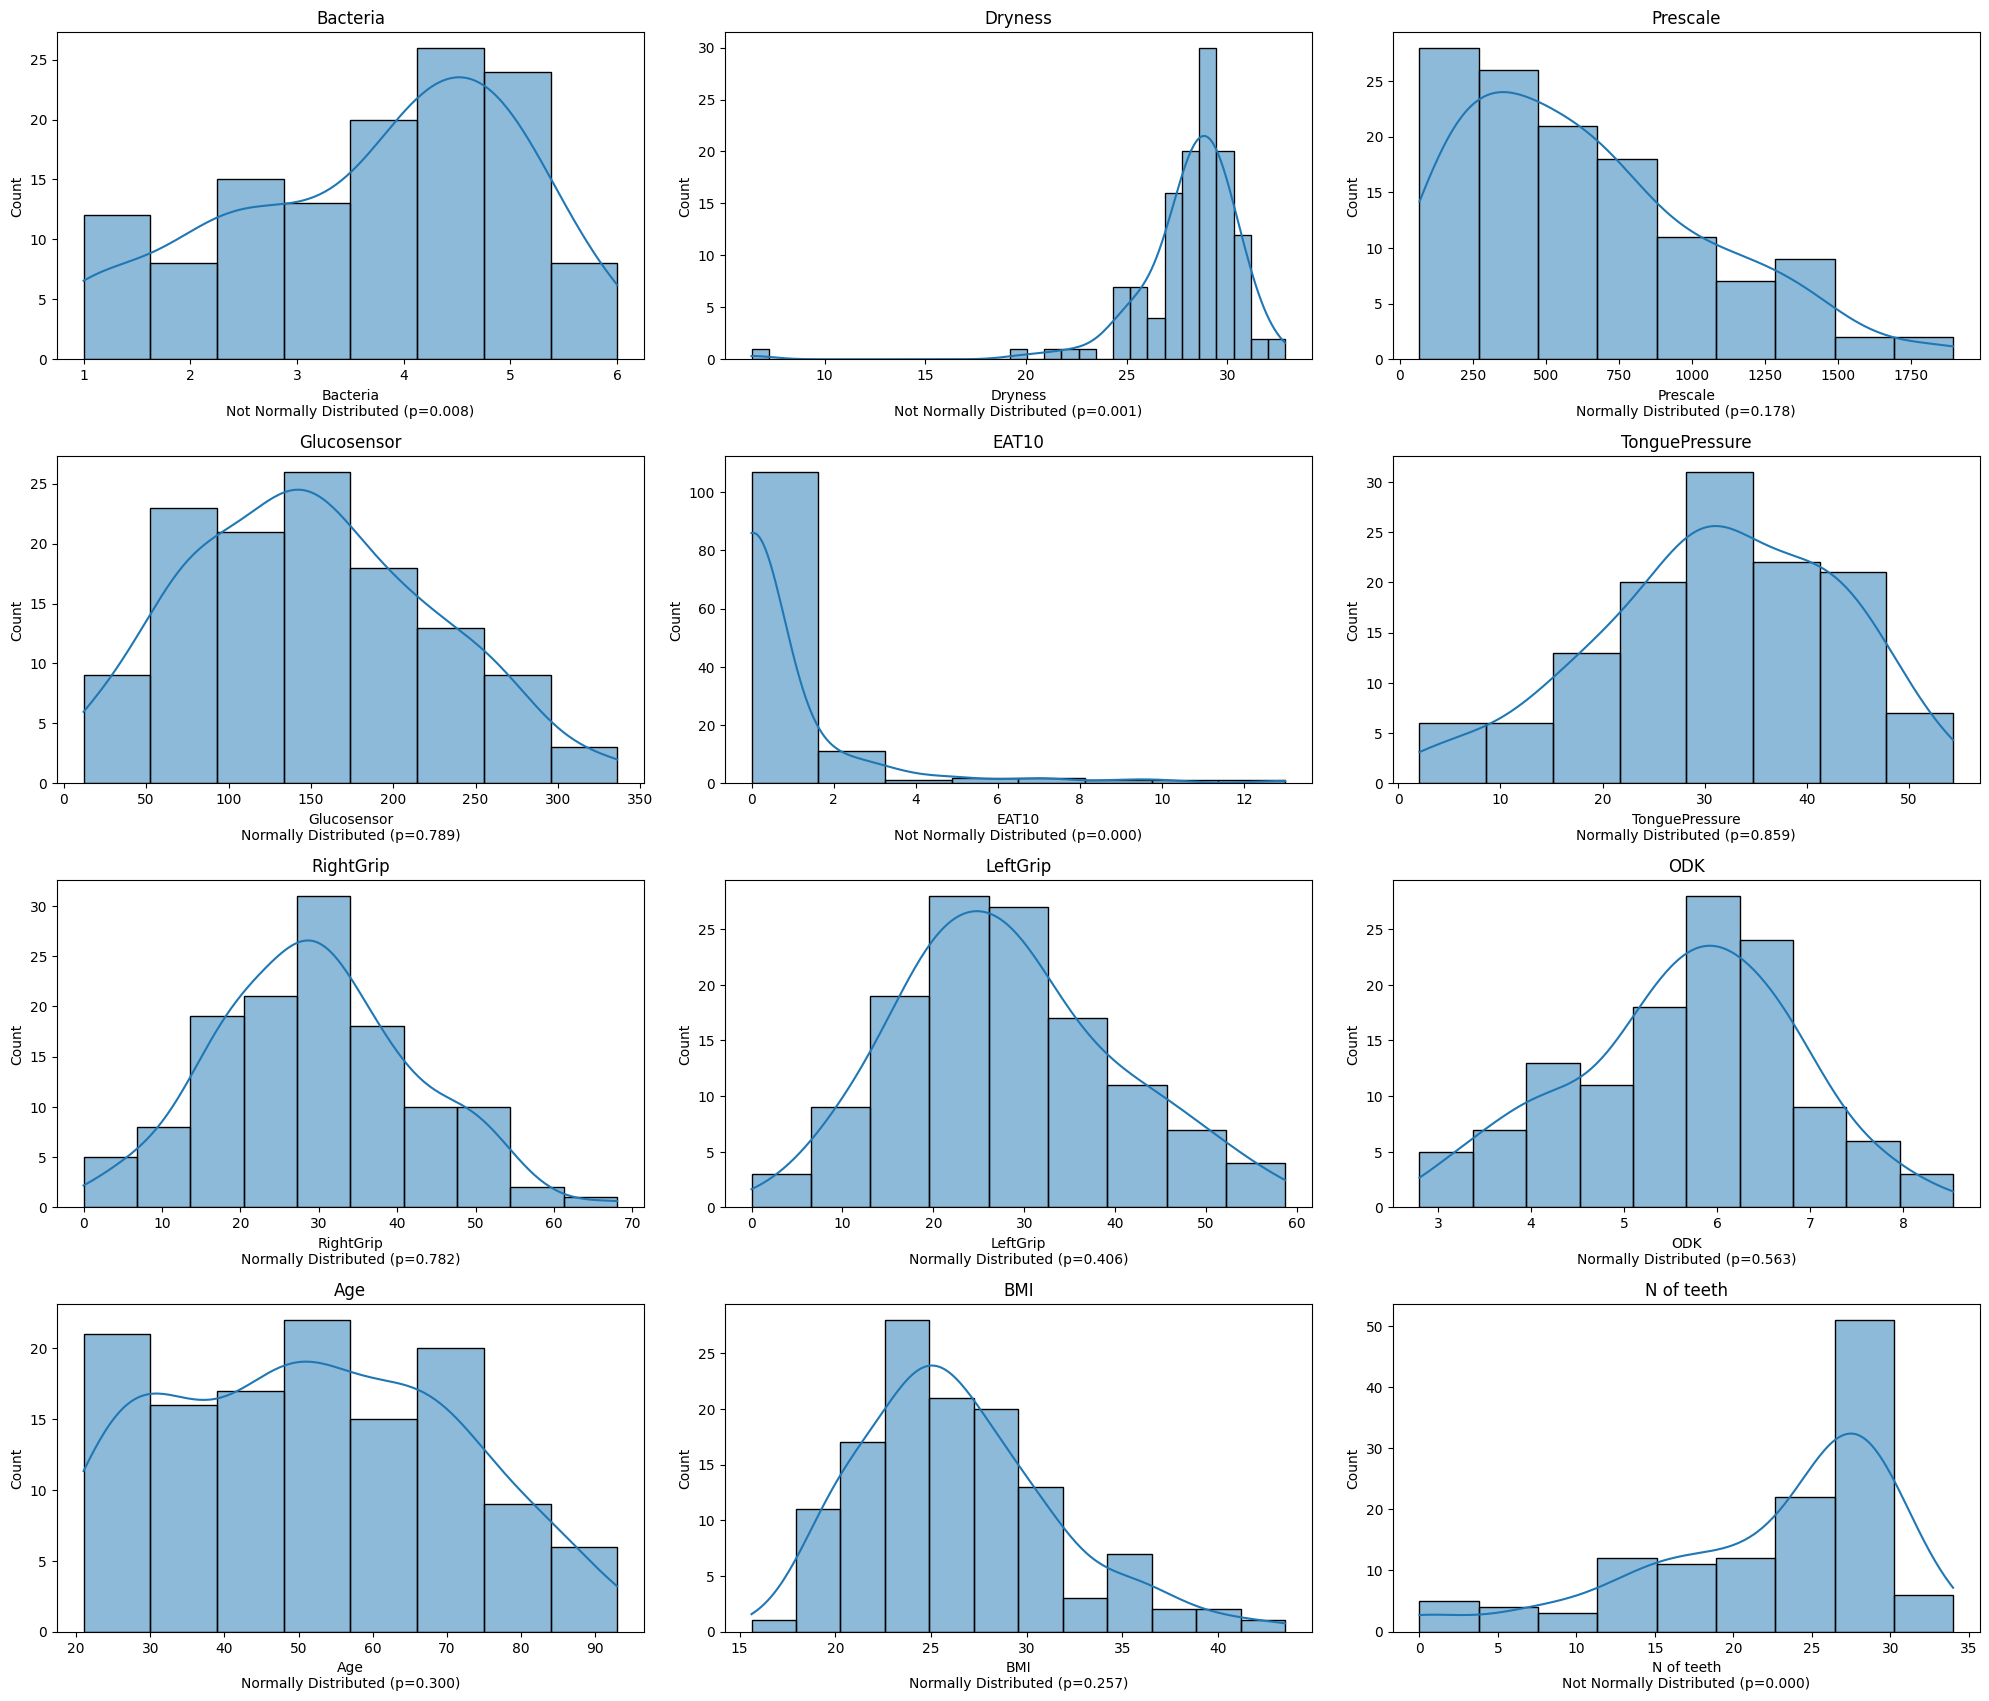

Normality Test Results (Kolmogorov-Smirnov Test):
Bacteria: Not Normally Distributed (p=0.008)
Dryness: Not Normally Distributed (p=0.001)
Prescale: Normally Distributed (p=0.178)
Glucosensor: Normally Distributed (p=0.789)
EAT10: Not Normally Distributed (p=0.000)
TonguePressure: Normally Distributed (p=0.859)
RightGrip: Normally Distributed (p=0.782)
LeftGrip: Normally Distributed (p=0.406)
ODK: Normally Distributed (p=0.563)
Age: Normally Distributed (p=0.300)
BMI: Normally Distributed (p=0.257)
N of teeth: Not Normally Distributed (p=0.000)


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensuring the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK',
    'Age', 'BMI', 'N of teeth'
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Function to check normality and plot distributions using K-S test
def check_normality_and_plot_ks(df, numeric_columns):
    normality_results = {}
    plt.figure(figsize=(20, 25))
    for i, col in enumerate(numeric_columns):
        plt.subplot(6, 3, i+1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(col)
        
        # Perform K-S test
        data = df[col].dropna()
        stat, p_value = kstest(data, 'norm', args=(data.mean(), data.std()))
        normality_results[col] = p_value
        
        if p_value > 0.05:
            plt.xlabel(f'{col}\nNormally Distributed (p={p_value:.3f})')
        else:
            plt.xlabel(f'{col}\nNot Normally Distributed (p={p_value:.3f})')

    plt.tight_layout()
    plt.savefig('normality_results.png')
    plt.show()
    
    return normality_results

# Check normality and plot distributions using K-S test
normality_results_ks = check_normality_and_plot_ks(df, numeric_columns)

# Display results
print("Normality Test Results (Kolmogorov-Smirnov Test):")
for col, p_value in normality_results_ks.items():
    print(f"{col}: {'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'} (p={p_value:.3f})")

In [5]:
from scipy.stats import spearmanr

# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensuring the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK',
    'Age', 'BMI', 'N of teeth'
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix using Spearman correlation with p-values
def calculate_correlation_matrix(df, numeric_columns):
    correlation_matrix = pd.DataFrame(index=numeric_columns, columns=numeric_columns)
    p_values_matrix = pd.DataFrame(index=numeric_columns, columns=numeric_columns)

    for col1 in numeric_columns:
        for col2 in numeric_columns:
            if col1 == col2:
                correlation_matrix.loc[col1, col2] = 1.0
                p_values_matrix.loc[col1, col2] = np.nan
                continue

            # Drop NaNs and ensure lengths match
            valid_indices = df[[col1, col2]].dropna().index
            col1_clean = df.loc[valid_indices, col1]
            col2_clean = df.loc[valid_indices, col2]

            # Calculate Spearman correlation and p-value
            corr, p_value = spearmanr(col1_clean, col2_clean)
            correlation_matrix.loc[col1, col2] = corr
            p_values_matrix.loc[col1, col2] = p_value
            print(f'Spearman correlation between {col1} and {col2}: {corr:.3f}, p-value: {p_value:.5f}')

    return correlation_matrix, p_values_matrix

# Compute the correlation matrix and p-values
correlation_matrix, p_values_matrix = calculate_correlation_matrix(df, numeric_columns)

# Display results
print(correlation_matrix)
print(p_values_matrix)


NameError: name 'np' is not defined

In [13]:
from scipy.stats import pearsonr

# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensuring the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK',
    'Age', 'BMI', 'N of teeth'
]

# Calculate correlation matrix using Pearson correlation with p-values
def calculate_correlation_matrix(df, numeric_columns):
    correlation_matrix = pd.DataFrame(index=numeric_columns, columns=numeric_columns)
    p_values_matrix = pd.DataFrame(index=numeric_columns, columns=numeric_columns)

    for col1 in numeric_columns:
        for col2 in numeric_columns:
            if col1 == col2:
                correlation_matrix.loc[col1, col2] = 1.0
                p_values_matrix.loc[col1, col2] = np.nan
                continue

            # Drop NaNs and ensure lengths match
            valid_indices = df[[col1, col2]].dropna().index
            col1_clean = df.loc[valid_indices, col1]
            col2_clean = df.loc[valid_indices, col2]

            # Calculate Pearson correlation and p-value
            corr, p_value = pearsonr(col1_clean, col2_clean)
            correlation_matrix.loc[col1, col2] = corr
            p_values_matrix.loc[col1, col2] = p_value
            print(f'Pearson correlation between {col1} and {col2}: {corr:.3f}, p-value: {p_value:.5f}')

    return correlation_matrix, p_values_matrix

# Compute the correlation matrix and p-values
correlation_matrix, p_values_matrix = calculate_correlation_matrix(df, numeric_columns)

# Display results
print(correlation_matrix)
print(p_values_matrix)


NameError: name 'np' is not defined

In [14]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multitest import multipletests

# Function to calculate ANOVA for each numeric column across sex categories
def calculate_anova(df, numeric_columns, group_column):
    results = {}

    for col in numeric_columns:
        groups = []
        for group_name, group_data in df.groupby(group_column):
            groups.append(group_data[col].dropna())

        # Perform ANOVA
        f_statistic, p_value = f_oneway(*groups)
        results[col] = {'F-statistic': f_statistic, 'p-value': p_value}

        print(f'ANOVA results for {col}: F-statistic={f_statistic:.4f}, p-value={p_value:.5f}')

    return results

# Define your numeric columns of interest
cols = ['Bacteria', 'Dryness', 'Prescale', 'ODK',
        'TonguePressure', 'Glucosensor', 'EAT10', 'RightGrip', 'LeftGrip', 
        'Body height (cm)', 'Body weight (kg)', 
        'BMI', 'N of teeth', 'N of Rootremnance', 'N of Implant', 'Age']

# Calculate ANOVA for each numeric column across 'Sex'
anova_results = calculate_anova(df, cols, 'Sex')

# Print ANOVA results
for col, result in anova_results.items():
    print(f'{col}: F-statistic = {result["F-statistic"]:.4f}, p-value = {result["p-value"]:.5f}')

# Function to perform Tukey's HSD test and apply Bonferroni correction
def perform_tukey_hsd(df, numeric_columns, group_column):
    posthoc_results = {}

    for col in numeric_columns:
        # Drop rows with NaNs in either the numeric column or the group column
        data = df[[col, group_column]].dropna()
        
        # Perform Tukey's HSD test
        mc = MultiComparison(data[col], data[group_column])
        tukey_result = mc.tukeyhsd(alpha=0.05)
        
        # Convert the Tukey's HSD result to a DataFrame
        tukey_result_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
        
        # Apply Bonferroni correction to p-values
        p_adj = multipletests(tukey_result_df['p-adj'].astype(float), method='bonferroni')[1]
        tukey_result_df['p-adj (Bonferroni)'] = p_adj
        
        posthoc_results[col] = tukey_result_df

        print(f'Tukey HSD results for {col}:')
        print(tukey_result_df)

    return posthoc_results

# Perform Tukey's HSD test with Bonferroni correction for each numeric column across 'Sex'
posthoc_results = perform_tukey_hsd(df, cols, 'Sex')

# Print corrected Tukey's HSD results
for col, result in posthoc_results.items():
    print(f'Corrected Tukey HSD results for {col}:')
    print(result)


ANOVA results for Bacteria: F-statistic=0.0245, p-value=0.87578
ANOVA results for Dryness: F-statistic=0.3227, p-value=0.57105
ANOVA results for Prescale: F-statistic=1.5229, p-value=0.21955
ANOVA results for ODK: F-statistic=8.6315, p-value=0.00395
ANOVA results for TonguePressure: F-statistic=4.8989, p-value=0.02870
ANOVA results for Glucosensor: F-statistic=1.9968, p-value=0.16022
ANOVA results for EAT10: F-statistic=0.7243, p-value=0.39637
ANOVA results for RightGrip: F-statistic=68.4674, p-value=0.00000
ANOVA results for LeftGrip: F-statistic=91.4793, p-value=0.00000
ANOVA results for Body height (cm): F-statistic=86.3035, p-value=0.00000
ANOVA results for Body weight (kg): F-statistic=23.3736, p-value=0.00000
ANOVA results for BMI: F-statistic=0.3642, p-value=0.54728
ANOVA results for N of teeth: F-statistic=0.1728, p-value=0.67837
ANOVA results for N of Rootremnance: F-statistic=2.6926, p-value=0.10335
ANOVA results for N of Implant: F-statistic=2.1853, p-value=0.14187
ANOVA res